# Bowling Performance Analysis in IPL

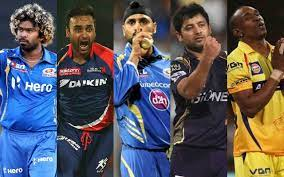

# Reading Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

balls = pd.read_csv("IPL Deliveries 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

display(balls.head(2),matches.head(2))

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


# Adding Extra Columns as per Requirements
We add columns for -
1. `bowler_wicket` - 1 if wicket taken by bowler e.g. by bowled, LBW, caught etc. else 0
2. `bowled_wicket` - 1 if wicket type is **bowled** else 0

In [2]:
def is_bowlers_wick(x, y):
    if (x not in["run out","retired hurt","obstructing the field","hit wicket"]) & (y==1):
        return 1
    else:
        return 0
        
    
balls["bowler_wicket"] = balls.apply(lambda row: is_bowlers_wick(row["dismissal_kind"], row["is_wicket"]), axis=1)
balls["bowler_wicket"].loc[balls.is_wicket==1]

balls.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowler_wicket
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0


# Maximum Wicket Takers

Bowlers who take maximum wickets in IPL history overall.

In [3]:
bowlers_wickets = balls.groupby(["bowler"])["bowler_wicket"].sum()
bowlers_wickets = bowlers_wickets.sort_values(ascending=False).iloc[0:50]

c:\users\shubham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x360 with 0 Axes>

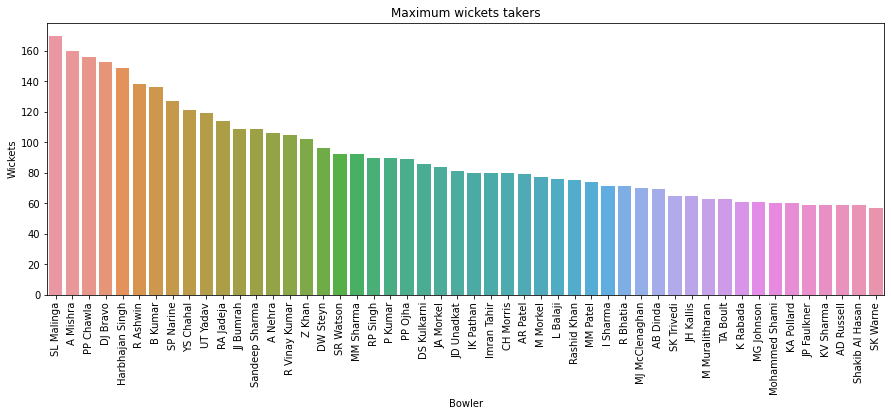

<Figure size 1080x360 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(bowlers_wickets.index, bowlers_wickets)

plt.title("Maximum wickets takers")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation = 90)
plt.figure(figsize=(15, 5))


# Maximum Bowled Wickets

Bowled wickets are those wickets which taken such that their is no involvements of any other fielder and wicket falls due to hitting the ball to the stumps.

In [5]:
def bowled_wick(x):
    if (x == "bowled"):
        return 1
    else:
        return 0


balls["bowled_wickets"] = balls.apply(lambda row: bowled_wick(row["dismissal_kind"]), axis=1)

bowled_wickets = balls.groupby(["bowler"])["bowled_wickets"].sum()
bowled_wickets = bowled_wickets.sort_values(ascending=False).iloc[0:20]

bowled_wickets_df = pd.DataFrame({"Bowler":bowled_wickets.index,
                               "Wickets":bowled_wickets.values,
                              },
                              index = np.arange(1,21,1)
                             )
bowled_wickets_df

,Bowler,Wickets
1,SL Malinga,63
2,PP Chawla,43
3,SP Narine,36
4,B Kumar,36
5,RA Jadeja,29
6,Harbhajan Singh,29
7,DW Steyn,26
8,JJ Bumrah,26
9,YS Chahal,25
10,A Mishra,25


c:\users\shubham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x360 with 0 Axes>

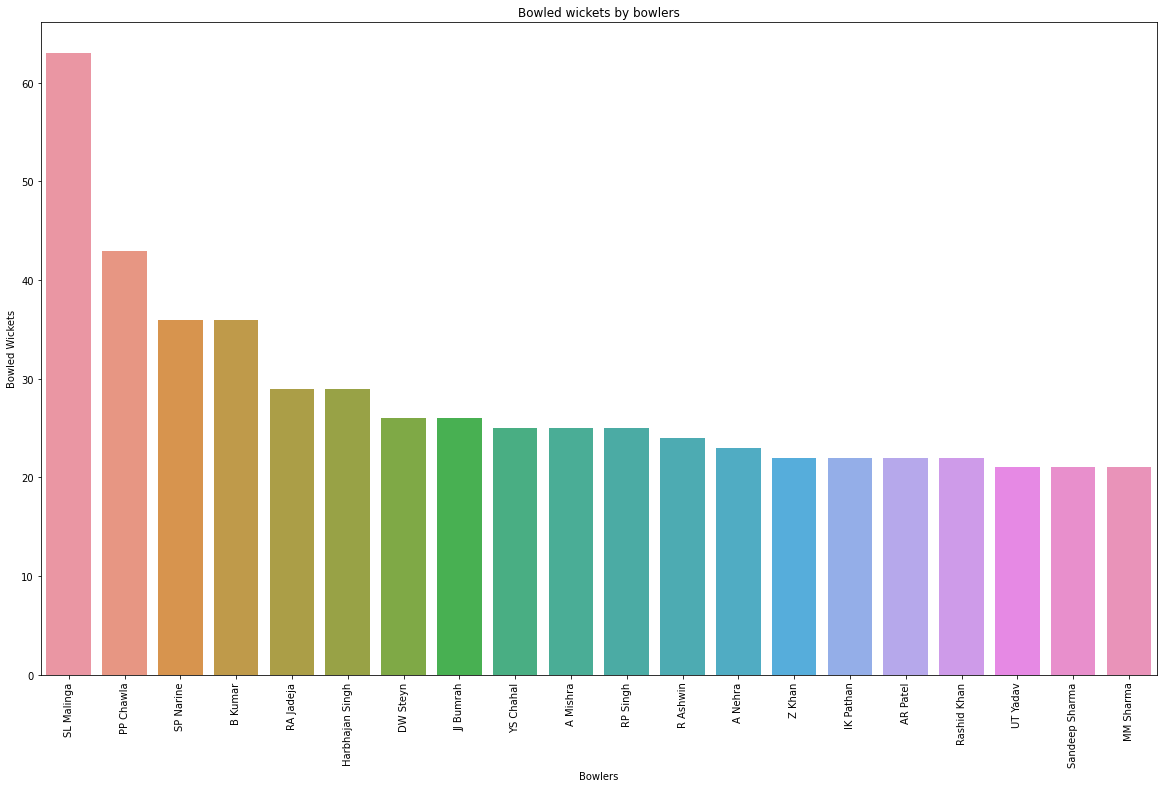

<Figure size 1080x360 with 0 Axes>

In [6]:
plt.figure(figsize=(20,12))
sns.barplot(bowled_wickets.index, bowled_wickets)
plt.title("Bowled wickets by bowlers")
plt.xlabel("Bowlers")
plt.ylabel("Bowled Wickets")
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))

# Maximum Run-Outs

finding fielsers who made maximum of run outs

In [7]:
def is_runout(x):
    if x=="run out":
        return 1
    else:
        return 0

balls["runout"] = balls.apply(lambda row : is_runout(row["dismissal_kind"]), axis =1)

fielders = balls.groupby(["fielder"], as_index = False)["runout"].sum()
fielders = fielders.sort_values("runout", ascending=False)

fielders_df = pd.DataFrame({ "Fielder" : fielders.fielder,
                             "Runout"  : fielders.runout,})
fielders_df.iloc[0:20]

,Fielder,Runout
484,MS Dhoni,12
464,"MK Pandey,RV Uthappa",9
359,KD Karthik,8
757,SV Samson,7
816,V Kohli,7
859,YK Pathan,6
90,AT Rayudu,6
604,RA Jadeja,6
32,AB de Villiers,6
543,PA Patel,6


# Best Economies

Best Economical bowlers are those who has average minimum runs per over, founded by finding mean of runs for each over, for each player. 

In [8]:
# Grouping BOWLER, MATCH & OVER with summation of TOTAL RUNS ,such that output data frame gives 
# bowler and each over with their total runs

runs_each_over = balls.groupby(["bowler","id","over"], as_index=False)["total_runs"].sum()

# As above dataframe RUNS_EACH_OVER gives bowlers their each over and runs in that over
# We find total overs bowled by each bowler by grouping BOWLER again and counting rows of OVER

overs_bowled = runs_each_over.groupby(["bowler"], as_index=False)["over"].count()

# TO find bowlers with overs bowled more than 60 overs
# Select OVERS_BOWLED dataframe by OVER count > 60

bowlers_bowled_more  = overs_bowled.loc[overs_bowled["over"]>60]

# To find economies find mean of TOTAL_RUNS column in RUNS_EACH_OVER dataframe

economies = runs_each_over.groupby(["bowler"])["total_runs"].mean()

# We find economies for bowlers who bowled more than 60 overs from BOWLERS_BOWLED_MORE

economies = economies.loc[bowlers_bowled_more["bowler"]]

# Forming data frame

economies_df = pd.DataFrame({"Bowler":economies.index,
                             "Economy":economies.values,
    
                            })

economies_df = economies_df.sort_values("Economy").reset_index(drop = True)
economies_df = economies_df.loc[0:20] 

c:\users\shubham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x360 with 0 Axes>

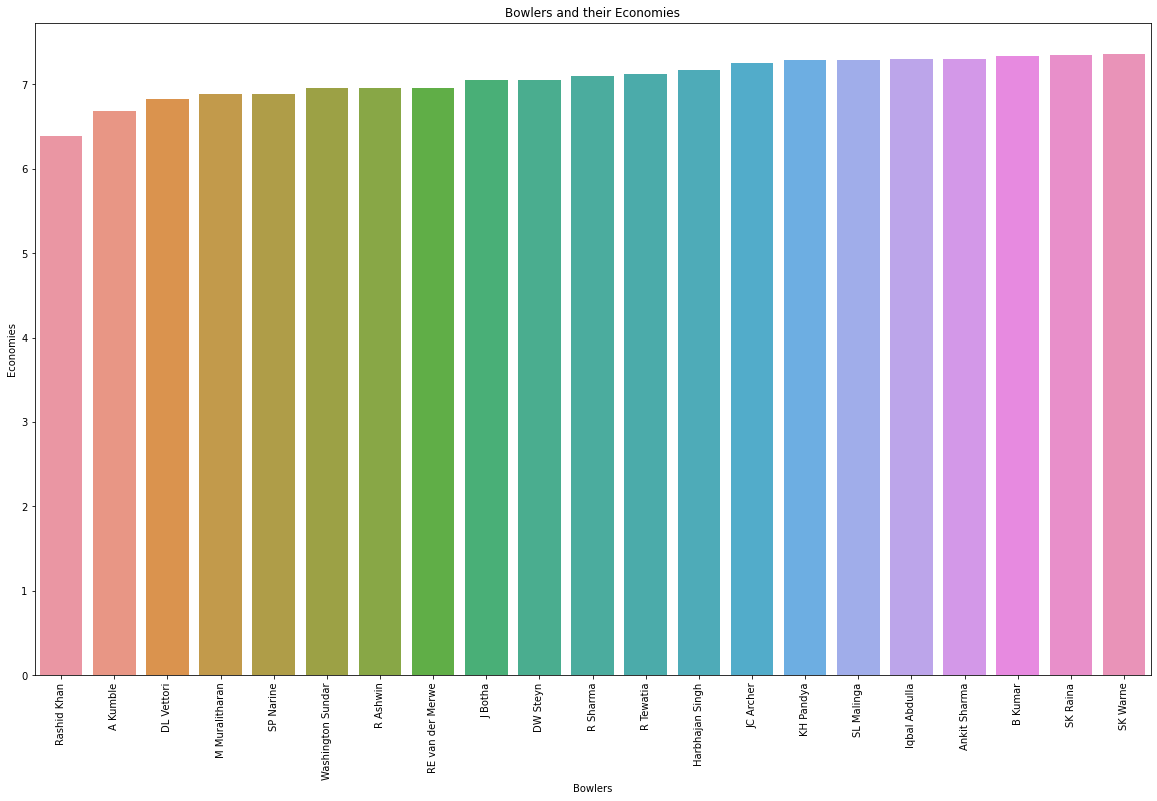

<Figure size 1080x360 with 0 Axes>

In [9]:
# Plot the Bowlers and Economies
plt.figure(figsize=(20,12))
sns.barplot(economies_df.Bowler,economies_df.Economy)
plt.title("Bowlers and their Economies")
plt.xlabel("Bowlers")
plt.ylabel("Economies")
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))

# Maximum Dot Balls

Maximum dot balls bowling bowlers are those who bowled maximum balls such that their is no run on that on.


In [10]:
# Filter dataframe of balls with TOTAL_RUNS on ball is 0
dot_balls = balls.loc[balls["total_runs"]==0]
# Groupby filtered dataframe by BOWLER and counting TOTAL_RUNS rows
dot_balls = dot_balls.groupby(["bowler"])["total_runs"].count()
# sort the Dataframe with having Top 10 bowlers with dot balls
dot_balls = dot_balls.sort_values(ascending=False).iloc[0:10]
#Forming Datarame
dot_balls_df = pd.DataFrame({"Bowler": dot_balls.index,
                             "Dot Balls":dot_balls.values,
                            })
dot_balls_df = dot_balls_df.sort_values("Dot Balls", ascending=False).reset_index(drop=True)
dot_balls_df

,Bowler,Dot Balls
0,Harbhajan Singh,1244
1,R Ashwin,1166
2,B Kumar,1155
3,SL Malinga,1144
4,PP Chawla,1137
5,A Mishra,1125
6,SP Narine,1100
7,P Kumar,1075
8,DW Steyn,1019
9,UT Yadav,954


c:\users\shubham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x360 with 0 Axes>

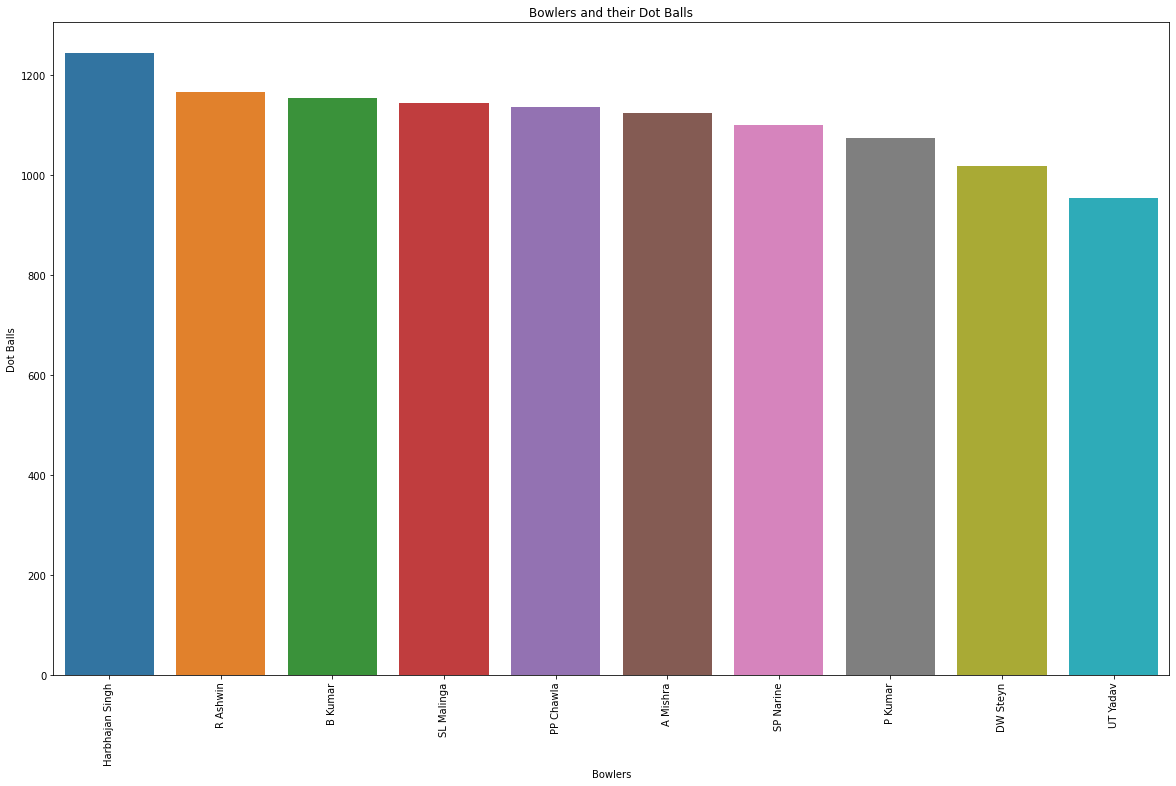

<Figure size 1080x360 with 0 Axes>

In [11]:
# Plot the Bowlers and Dot Balls
plt.figure(figsize=(20,12))
sns.barplot(dot_balls_df.Bowler,dot_balls_df["Dot Balls"])
plt.title("Bowlers and their Dot Balls")
plt.xlabel("Bowlers")
plt.ylabel("Dot Balls")
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))

# Maximum Maiden Overs

Maximum Maiden overs taking bowlers are those who bowled maximum overs such that their is no run in a over 

In [12]:
# group ID, BOWLER, OVER and find summation of TOTAL_RUNS so that we can filter using TOTAL_RUN == 0 in over
bowler_overs = balls.groupby(["id","bowler","over"], as_index=False)["total_runs"].sum()
maiden_overs = bowler_overs.loc[bowler_overs["total_runs"]==0]

# count maiden overs by grouping them by BOWLER
most_maiden_overs = maiden_overs.groupby(["bowler"])["total_runs"].count()

# Forimg Dataframes
most_maiden_overs_df = pd.DataFrame({"Bowler":most_maiden_overs.index,
                                     "Maiden Overs":most_maiden_overs.values,
    
                                    })
most_maiden_overs_df = most_maiden_overs_df.sort_values("Maiden Overs", ascending=False).reset_index(drop=False).iloc[0:20]

c:\users\shubham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x360 with 0 Axes>

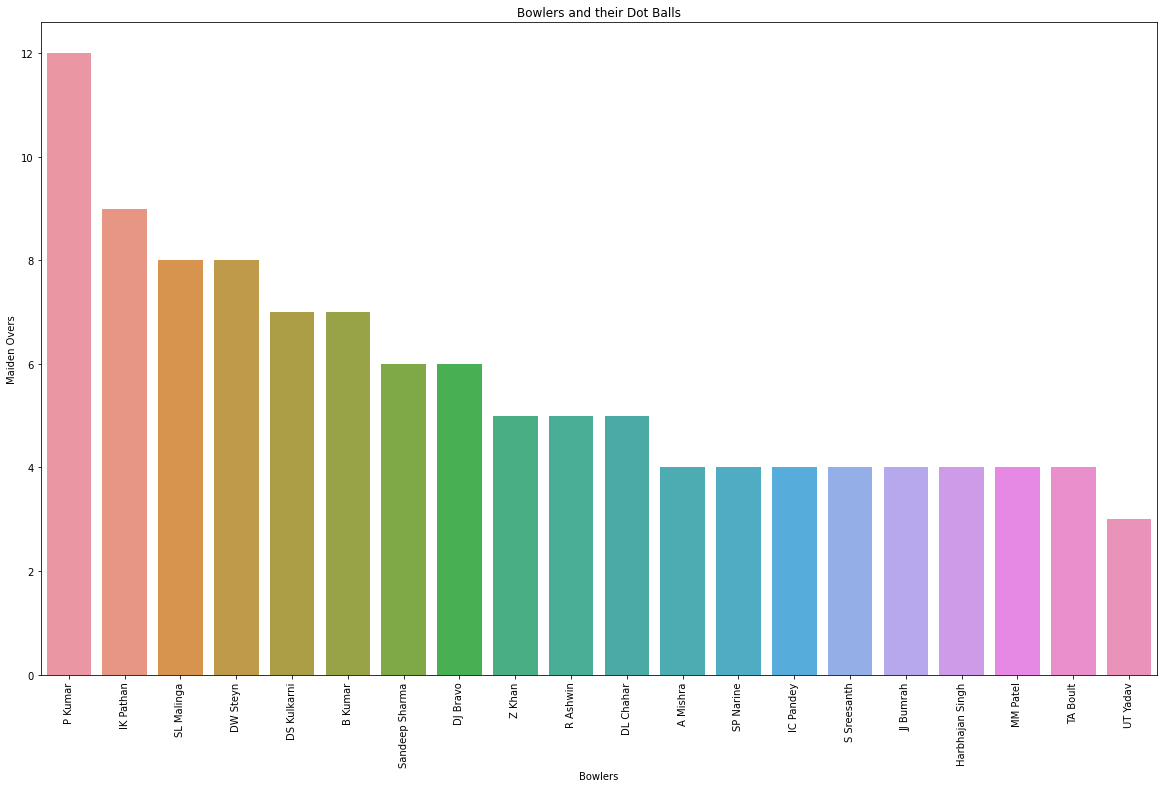

<Figure size 1080x360 with 0 Axes>

In [13]:
# Plot the Bowlers and Maiden Overs
plt.figure(figsize=(20,12))
sns.barplot(most_maiden_overs_df.Bowler,most_maiden_overs_df["Maiden Overs"])
plt.title("Bowlers and their Dot Balls")
plt.xlabel("Bowlers")
plt.ylabel("Maiden Overs")
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))